In [184]:
import neuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3

n = nn.neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [186]:
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

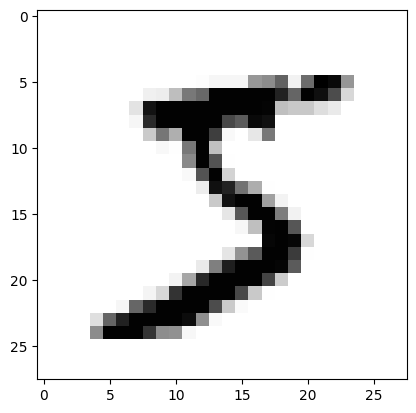

In [187]:
# example of visualizing the first entry in the dataset
all_values = data_list[0].split(',')
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

3


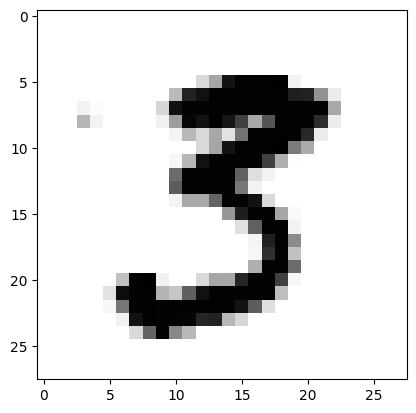

In [188]:
# example of visualizing the 50th entry in the dataset
all_values = data_list[49].split(',')
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
print(data_list[49][0])

In [189]:
# we have to normalize the input values to be between 0.01 and 1.0 so the neural network avoids saturation
scaled_input = (np.asarray(all_values[1:], dtype=float)/255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [266]:
# new neural network instance that will be trained with MNIST dataset
input_nodes = 784 #28x28 pixels
hidden_nodes = 200 #amount of patterns or features to be learned
output_nodes = 10 #digits 0-9
learning_rate = 0.1

n = nn.neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [267]:
# load MNIST training data csv into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [286]:
# train the network
epochs = 1
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asarray(all_values[1:], dtype=float)/255 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [287]:
# load the MNIST test data csv file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [288]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


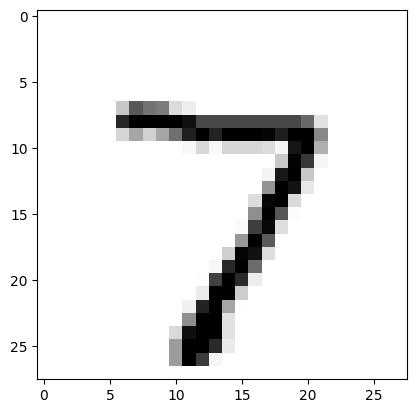

In [289]:
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [290]:
n.query((np.asarray(all_values[1:], dtype=float)/255.0 * 0.99) + 0.01)
#notice how the index corresponding to number 7 is larger than the other indices

array([[0.02847274],
       [0.008664  ],
       [0.03154045],
       [0.00840931],
       [0.0043927 ],
       [0.00702251],
       [0.00524369],
       [0.9781536 ],
       [0.00616695],
       [0.00347845]])

In [291]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    inputs = (np.asarray(all_values[1:], dtype=float)/255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

In [292]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [293]:
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.9731


In [ ]:
# This is where we load our own fixed images
import imageio.v3
import glob
own_dataset = []
for image in sorted(glob.glob("my_num/*.png")):
    label = int(image[7])
    print("loading...", image)
    img_array = imageio.v3.imread(image, mode='F')
    img_data = 255.0 - img_array.reshape(784)
    lo, hi = img_data.min(), img_data.max()
    if hi > lo:
        img_data = (img_data - lo) / (hi - lo) * 255.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(np.min(img_data))
    print(np.max(img_data))
    record = np.append(label, img_data)
    own_dataset.append(record)


loading... my_num/0.png
0.01
1.0
loading... my_num/1.png
0.01
1.0
loading... my_num/2.png
0.01
1.0
loading... my_num/3.png
0.01
1.0
loading... my_num/4.png
0.01
1.0
loading... my_num/5.png
0.01
1.0
loading... my_num/6.png
0.01
1.0
loading... my_num/7.png
0.01
1.0
loading... my_num/8.png
0.01
1.0
loading... my_num/9.png
0.01
1.0


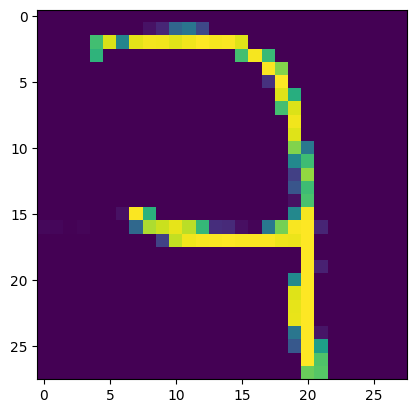

In [313]:
# Select item for testing
item = 7
plt.imshow(own_dataset[item][1:].reshape((28,28)))

7.0
[[0.00145001]
 [0.00263654]
 [0.05877539]
 [0.010846  ]
 [0.03387003]
 [0.00349943]
 [0.04091941]
 [0.00393604]
 [0.00100378]
 [0.03840114]]
network's answer = 2
no match!


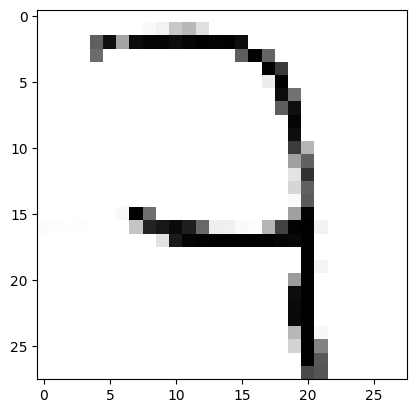

In [314]:
print(own_dataset[item][0])
plt.imshow(own_dataset[item][1:].reshape(28, 28), cmap = 'Greys', interpolation='None')
correct_label = own_dataset[item][0]
inputs = own_dataset[item][1:]
outputs = n.query(inputs)
print(outputs)

label = np.argmax(outputs)
print("network's answer =", label)
if (label == correct_label):
    print("match!")
else:
    print("no match!")